In [ ]:
# Libraries
from google.colab import drive
import pandas as pd
import geopandas as gpd

Uploading, profiling, and merging

In [ ]:
# Data uploads
drive.mount('/content/drive')

# File paths
file_path = "/content/drive/My Drive/all_feature_data_avg.csv"

# Reading in as pd dfs
avg_df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
avg_df.shape

(45338, 16)

In [ ]:
avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45338 non-null  int64  
 1   year_index  45338 non-null  int64  
 2   index       45338 non-null  int64  
 3   id2         45338 non-null  int64  
 4   year        45338 non-null  int64  
 5   yield       45338 non-null  float64
 6   tmmx        45338 non-null  float64
 7   rmax        45338 non-null  float64
 8   vs          45338 non-null  float64
 9   sph         45338 non-null  float64
 10  srad        45338 non-null  float64
 11  vpd         45338 non-null  float64
 12  rmin        45338 non-null  float64
 13  pr          45338 non-null  float64
 14  tmmn        45338 non-null  float64
 15  th          45338 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 5.5 MB


In [ ]:
avg_df.head()

,Unnamed: 0,year_index,index,id2,year,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th
0,0,0,1,112,1980,27.0,302.547299,88.534865,4.169133,0.010406,244.856055,1.477316,34.108888,2.150448,287.698991,182.028998
1,1,1,2,113,1980,28.0,302.068878,85.865079,3.564974,0.010097,243.893545,1.461499,34.400296,2.342725,287.706825,192.143968
2,2,2,3,119,1980,29.0,303.100471,91.763880,3.560391,0.011191,251.878185,1.429625,36.004177,2.067676,288.491839,178.083970
3,3,3,4,120,1980,28.0,302.966961,88.569844,3.964970,0.010669,250.073255,1.484913,35.960727,2.714061,288.009203,192.123030
4,4,4,5,124,1980,24.0,303.312180,89.555033,3.494477,0.011313,254.001956,1.481304,36.824029,2.435780,289.358179,176.449627


In [ ]:
# Reading in shp file
shapefile_path = '/content/drive/MyDrive/CornBeltCounty.shp'

shp_gdf = gpd.read_file(shapefile_path)

In [ ]:
shp_gdf.shape

(1443, 13)

In [ ]:
shp_gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,Area,geometry
0,244,USA,United States,4,Arkansas,111,Baxter,County,County,None,None,1.512190e+09,"POLYGON ((-92.15934 36.26188, -92.1603 36.1743..."
1,244,USA,United States,4,Arkansas,112,Benton,County,County,None,None,2.264963e+09,"POLYGON ((-94.07601 36.49915, -93.90713 36.498..."
2,244,USA,United States,4,Arkansas,113,Boone,County,County,None,None,1.558393e+09,"POLYGON ((-92.85413 36.49659, -92.85547 36.463..."
3,244,USA,United States,4,Arkansas,116,Carroll,County,County,None,None,1.650783e+09,"POLYGON ((-93.58427 36.49754, -93.36903 36.496..."
4,244,USA,United States,4,Arkansas,119,Clay,County,County,None,None,1.650761e+09,"POLYGON ((-90.21961 36.49638, -90.15357 36.496..."


In [ ]:
# Merge avg_df onto shp_gdf
merged_gdf = shp_gdf.merge(avg_df, left_on='ID_2', right_on='id2')

# Check result
print(merged_gdf.head())
print(merged_gdf.columns)

   ID_0  ISO         NAME_0  ID_1    NAME_1  ID_2  NAME_2  TYPE_2 ENGTYPE_2  \
0   244  USA  United States     4  Arkansas   111  Baxter  County    County   
1   244  USA  United States     4  Arkansas   112  Benton  County    County   
2   244  USA  United States     4  Arkansas   112  Benton  County    County   
3   244  USA  United States     4  Arkansas   112  Benton  County    County   
4   244  USA  United States     4  Arkansas   112  Benton  County    County   

  NL_NAME_2  ...        tmmx       rmax        vs       sph        srad  \
0      None  ...  300.556472  94.731915  3.240364  0.010739  228.479969   
1      None  ...  302.547299  88.534865  4.169133  0.010406  244.856055   
2      None  ...  299.662715  95.321876  3.881016  0.011460  223.559744   
3      None  ...  300.041649  94.122967  3.775011  0.011079  232.081297   
4      None  ...  300.639303  94.097118  3.815043  0.010995  237.410359   

        vpd       rmin        pr        tmmn          th  
0  1.027320  40

In [ ]:
merged_gdf.shape

(45338, 29)

Dashboarding

In [ ]:
two_yr = merged_gdf[merged_gdf['year'].isin([1980, 1981])]
two_yr['year'].value_counts()

,count
year,
1981,1329
1980,1302


In [ ]:
# import json

# # Ensure CRS is WGS84 (lat/lon)
# two_yr = two_yr.to_crs(epsg=4326)

# # Convert GeoDataFrame to GeoJSON
# geojson_data = json.loads(two_yr.to_json())

In [ ]:
# import plotly.graph_objects as go

# tolerance = 0.01

# two_yr['geometry'] = two_yr['geometry'].simplify(tolerance, preserve_topology=True)

# years = sorted(two_yr['year'].unique())

# # Create figure
# fig = go.Figure()

# for yr in years:
#     df_yr = two_yr[two_yr['year'] == yr]
#     fig.add_trace(
#         go.Choroplethmapbox(
#             geojson=geojson_data,
#             locations=df_yr['ID_2'],
#             z=df_yr['yield'],
#             featureidkey='properties.ID_2',
#             colorscale="YlGn",
#             zmin=two_yr['yield'].min(),
#             zmax=two_yr['yield'].max(),
#             visible=(yr == years[0]),  # show first year initially
#             name=str(yr)
#         )
#     )

# # Dropdown buttons
# buttons = [
#     dict(
#         label=str(yr),
#         method="update",
#         args=[{"visible": [y == yr for y in years]},  # toggle visibility
#               {"title": f"Corn Yield {yr}"}]
#     )
#     for yr in years
# ]

# # Layout
# fig.update_layout(
#     mapbox_style="carto-positron",
#     mapbox_zoom=5,
#     mapbox_center={"lat": 41.5, "lon": -93.5},
#     updatemenus=[dict(active=0, buttons=buttons, x=0.1, y=1.15)]
# )


# output_path = '/content/drive/MyDrive/corn_yield_dashboard_v1.html'
# fig.write_html(output_path)

# print(f"Dashboard saved to: {output_path}")

# # try w/ two plots locally

Dashboard saved to: /content/drive/MyDrive/corn_yield_dashboard_v1.html


In [ ]:
merged_gdf.shape

(45338, 29)

Changepoint Detection

In [ ]:
import pandas as pd
import numpy as np
import ruptures as rpt

# Aggregate across counties
agg_df = merged_gdf.groupby("year")[["pr", "tmmn", "tmmx"]].mean().reset_index()

# Run changepoint detection on aggregated climate
X = agg_df[["pr", "tmmn", "tmmx"]].values
model = rpt.Pelt(model="rbf").fit(X)
breaks = model.predict(pen=0.5)

print("Global changepoints at indices:", breaks)

# Assign climate period based on global changepoints
def assign_periods(breaks, n):
    labels = np.zeros(n, dtype=int)
    current = 0
    prev = 0
    for cp in breaks:
        labels[prev:cp] = current
        prev = cp
        current += 1
    return labels

agg_df["climate_period"] = assign_periods(breaks, len(agg_df))

# Merge back to all counties
all_df = merged_gdf.merge(agg_df[["year", "climate_period"]], on="year", how="left")

# Summarize weather profiles per county × climate period
summary = all_df.groupby(["NAME_2", "climate_period"]).agg({
    "pr": ["mean", "std", "min", "max"],
    "tmmn": ["mean", "std", "min", "max"],
    "tmmx": ["mean", "std", "min", "max"]
}).reset_index()

print(summary)

Global changepoints at indices: [10, 20, 25, 30, 35, 39]
       NAME_2 climate_period        pr                                \
                                  mean       std       min       max   
0       Adair              0  3.348838  0.834446  1.515438  5.056012   
1       Adair              1  3.472881  0.705726  2.489351  5.307089   
2       Adair              2  3.389097  0.604724  2.436034  4.577388   
3       Adair              3  3.505912  1.063315  2.241623  5.989789   
4       Adair              4  3.743051  1.018624  2.208090  5.607927   
...       ...            ...       ...       ...       ...       ...   
4477  Ziebach              1  1.755206  0.327059  1.255733  2.215149   
4478  Ziebach              2  1.523400  0.403832  0.974125  2.006417   
4479  Ziebach              3  2.118544  0.508708  1.766826  2.701840   
4480  Ziebach              4  2.100340  0.525148  1.228108  2.579441   
4481  Ziebach              5  1.827218  0.332065  1.348787  2.106740   

      

In [ ]:
all_df.shape

(45338, 30)

CV Visualization

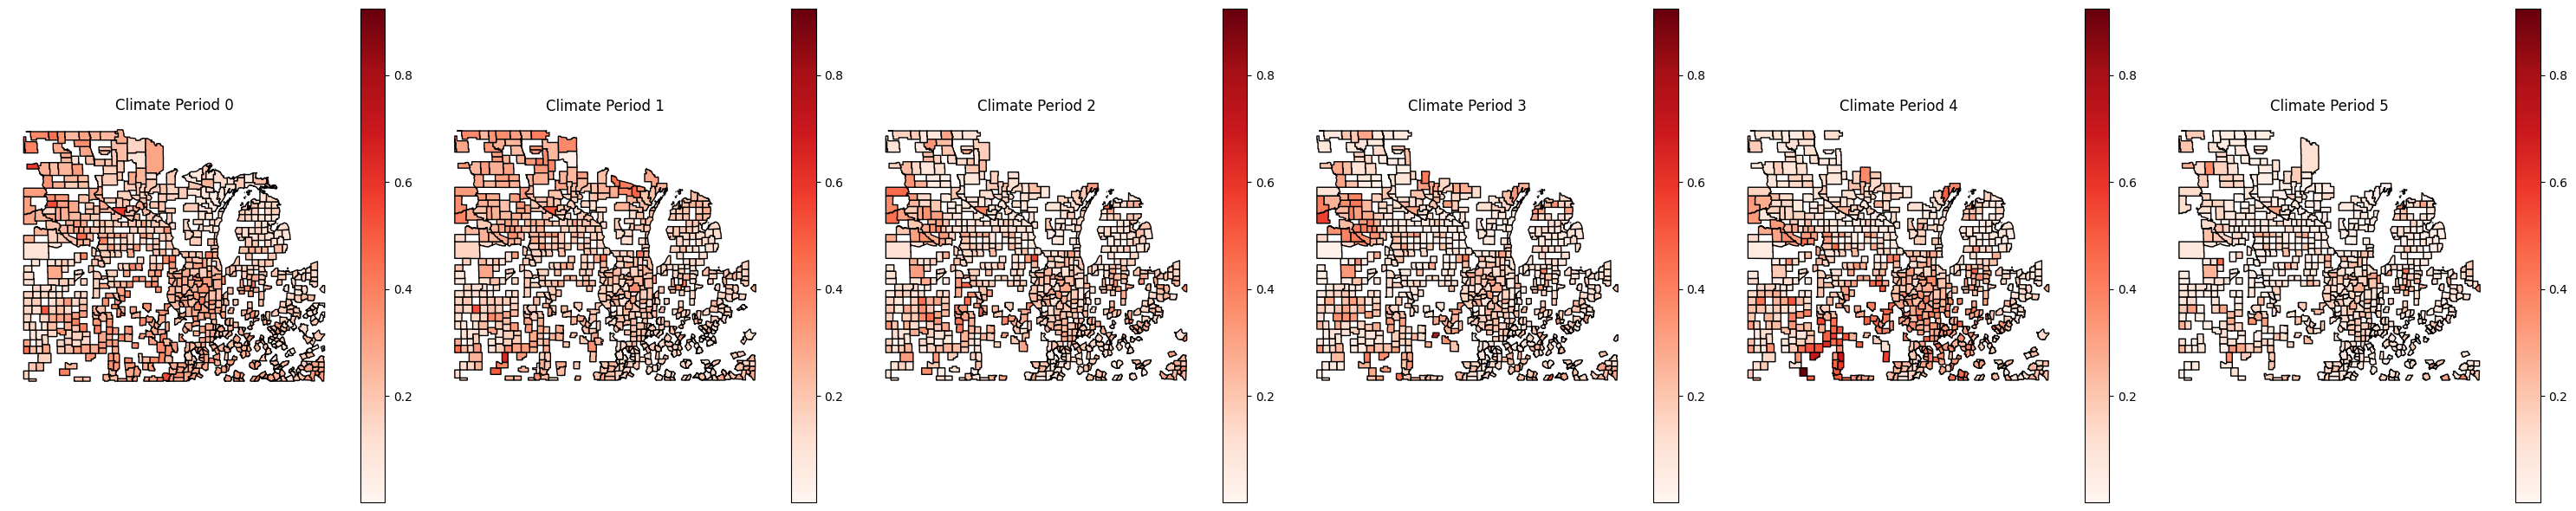

Most vulnerable counties (highest average CV):
NAME_2
Jones       0.423121
Alfalfa     0.415960
Haakon      0.404586
Cleburne    0.397101
Renville    0.392500
Howell      0.392347
Morris      0.377605
McDonald    0.374953
Ozark       0.372678
Dewey       0.357424
Name: yield_cv, dtype: float64


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate Coefficient of Variation (CV) per county × climate period
cv_df = all_df.groupby(["NAME_2", "climate_period"]).agg({
    "yield": ["mean", "std"]
}).reset_index()

cv_df.columns = ["NAME_2", "climate_period", "yield_mean", "yield_std"]

cv_df["yield_cv"] = cv_df["yield_std"] / cv_df["yield_mean"]

# Merge CV back into spatial data
all_df = all_df.drop(columns=["yield_mean", "yield_cv", "yield_std"], errors="ignore")
all_df = all_df.merge(cv_df, on=["NAME_2", "climate_period"], how="left")

# Create maps for each climate period
unique_periods = all_df["climate_period"].unique()
n_periods = len(unique_periods)

vmin = cv_df["yield_cv"].min()
vmax = cv_df["yield_cv"].max()

fig, axes = plt.subplots(1, n_periods, figsize=(5*n_periods, 6))

if n_periods == 1:
    axes = [axes]

for i, period in enumerate(sorted(unique_periods)):
    period_df = all_df[all_df["climate_period"] == period].drop_duplicates("NAME_2")

    period_df.plot(
        column="yield_cv",
        ax=axes[i],
        legend=True,
        cmap="Reds",
        edgecolor="black",
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_title(f"Climate Period {period}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Identify most vulnerable counties
vulnerability = cv_df.groupby("NAME_2")["yield_cv"].mean().sort_values(ascending=False)
print("Most vulnerable counties (highest average CV):")
print(vulnerability.head(10))
